<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_clustering_Combined_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])

In [4]:
#Adults
adu.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
270,1,0,1,1,1,1,0,0,1,1,...,f,NaN,no,yes,Russia,no,7,'18 and more',NaN,YES
697,1,1,1,1,1,0,0,0,0,1,...,f,Asian,no,no,Philippines,no,6,'18 and more',Self,NO
225,0,1,0,1,0,0,0,1,0,1,...,f,White-European,no,no,'United States',no,4,'18 and more',Self,NO
284,0,1,0,0,0,0,1,0,0,1,...,f,White-European,yes,no,'United Kingdom',no,3,'18 and more',Self,NO
445,1,0,0,0,0,0,0,1,0,1,...,m,White-European,no,yes,Australia,no,3,'18 and more',Self,NO


In [5]:
# Number of tuples and fields
print("Adults      :",adu.shape)

Adults      : (704, 21)


In [6]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [7]:
#Adults
adu.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [8]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [9]:
#Adults
adu.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


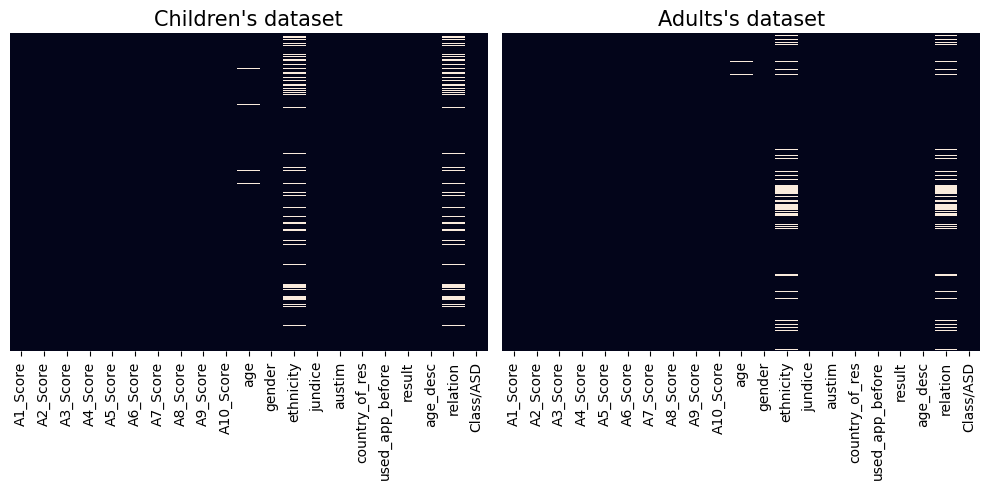

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0])
ax[0].set_title("Children's dataset",fontsize = 15)

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1])
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap.pdf', transparent=True, dpi=300)

In [11]:
#ASD or Not
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))

print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


In [12]:
# #Data distribution
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.countplot(adu['Class/ASD'],ax=ax)
# ax.set_title("Adults's dataset",fontsize = 15)
# fig.tight_layout()
# plt.savefig('distribution_adu.pdf', transparent=True, dpi=300)

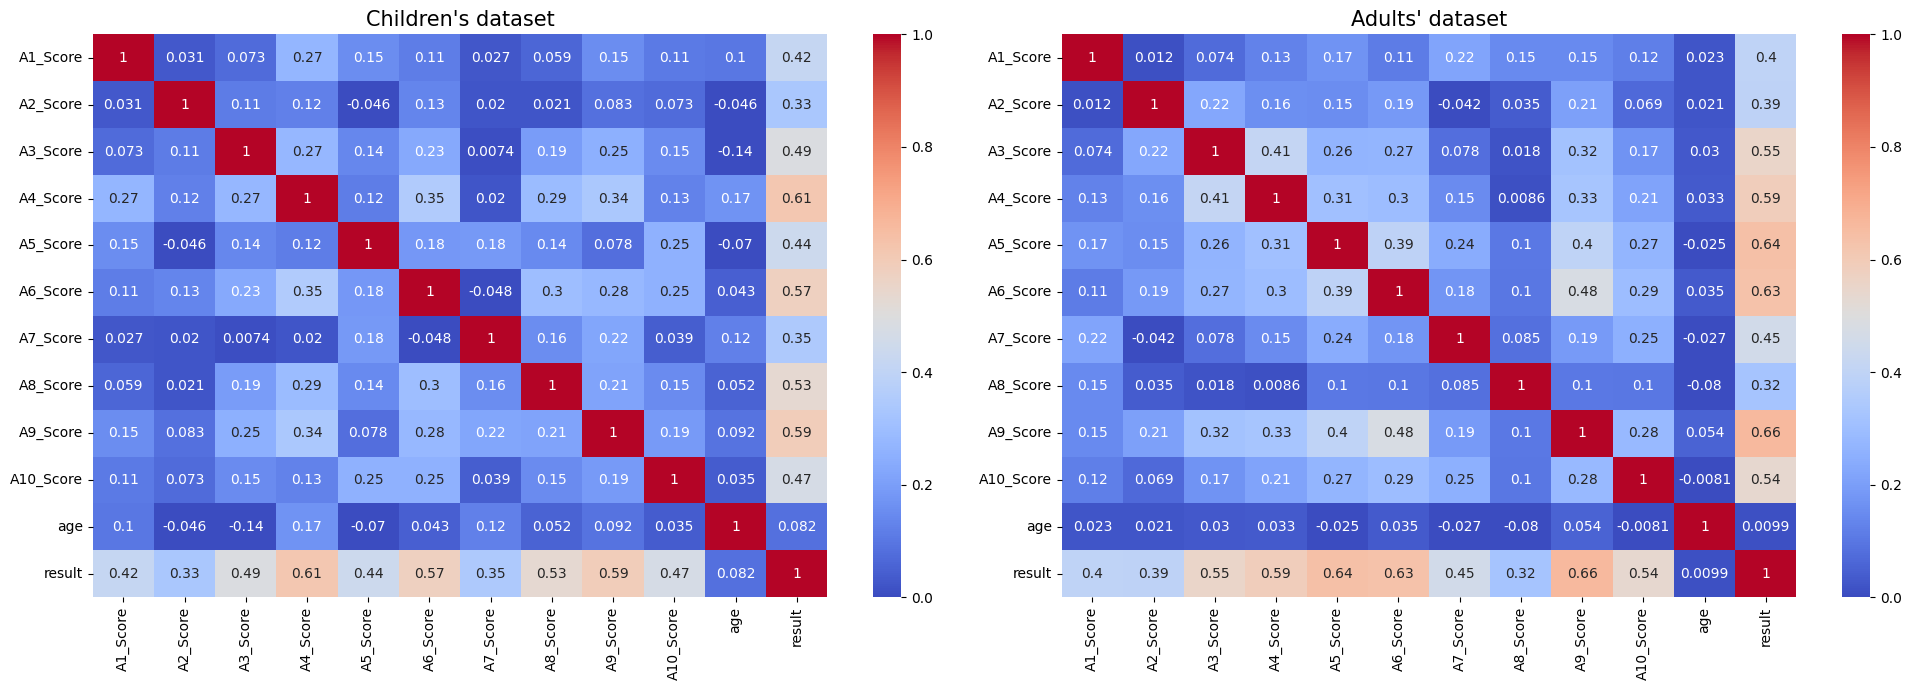

In [13]:
# Select only numeric columns from the datasets
ch_numeric = ch.select_dtypes(include=['int64', 'float64'])
adu_numeric = adu.select_dtypes(include=['int64', 'float64'])

# Plot heatmap for the children's and adults' datasets
fig, ax = plt.subplots(1, 2, figsize=(20,7))

sns.heatmap(ch_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax[0])  # Cover full range from -1 to 1
sns.heatmap(adu_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax[1])

ax[0].set_title("Children's dataset", fontsize=15)
ax[1].set_title("Adults' dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation.pdf', transparent=True, dpi=300)

plt.show()

In [14]:
#Number of missing values in each dataset
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Children's dataset    =  90
No of missing values in Adults's dataset      =  192


In [15]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]


#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [16]:
print("After imputing,\nNo of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset    =  0
After imputing,
No of missing values in Adults's dataset      =  0


In [17]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12
adu['Age_Mons'] = adu['Age_Mons']*12

In [18]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

In [19]:
#Adding a new field that represents the age group
ch['Age_group'] = 'Children'
adu['Age_group'] = 'Adults'

In [20]:
#Combining the dataset of children and adults to a single dataset
frames = [ch,adu]
final = pd.concat(frames)

In [21]:
#imputing missing values
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

final.country_of_res = imputer_mode.fit_transform(final.country_of_res.values.reshape(-1,1))[:,0]
final.used_app_before = imputer_mode.fit_transform(final.used_app_before.values.reshape(-1,1))[:,0]

In [22]:
final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,Age_group
0,1,1,0,0,1,1,0,1,0,0,...,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO,Children
1,1,1,0,0,1,1,0,1,0,0,...,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO,Children
2,1,1,0,0,0,1,1,1,0,0,...,White-European,no,no,Jordan,yes,5,'4-11 years',Parent,NO,Children
3,0,1,0,0,1,1,0,0,0,1,...,White-European,yes,no,Jordan,no,4,'4-11 years',Parent,NO,Children
4,1,1,1,1,1,1,1,1,1,1,...,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES,Children


In [23]:
final.shape

(996, 22)

In [24]:
print("\nNo of individuals diagonised with ASD = ",len(final[final['Class/ASD'] == 'YES']))
print("No of individuals not diagonised with ASD = ",len(final[final['Class/ASD'] == 'NO']))


No of individuals diagonised with ASD =  330
No of individuals not diagonised with ASD =  666


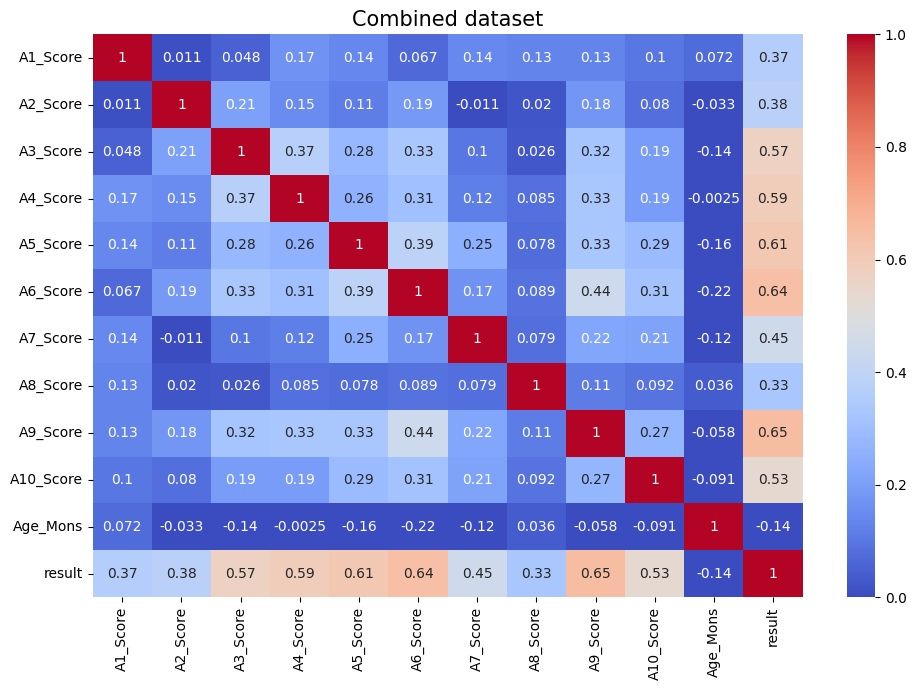

In [25]:
# Select only numeric columns from the dataset
final_numeric = final.select_dtypes(include=['int64', 'float64'])

# Plot heatmap for the combined dataset
fig, ax = plt.subplots(figsize=(10,7))

# Create the heatmap with correlations for numeric data
sns.heatmap(final_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)

# Set title
ax.set_title("Combined dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation_final.pdf', transparent=True, dpi=300)

plt.show()

*Spliting dependent and independent features*


In [26]:
shuffled_data = final.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=666)
final= pd.concat([ASD_data, non_ASD_data])

In [27]:
# Split the data into features and target label
raw_target= final['Class/ASD']
raw_features = final[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'country_of_res','relation']]

*Feature Scaling*

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [29]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,country_of_res,relation
121,1,0,1,1,1,1,1,1,1,1,0.034301,f,White-European,no,no,'United States',Self
309,1,1,1,1,1,1,0,1,0,0,0.142480,f,'Middle Eastern ',no,no,'United Kingdom',Self
301,1,1,1,1,1,1,1,1,1,1,0.076517,f,White-European,yes,no,'United Kingdom',Self
524,1,1,1,1,0,1,0,1,1,1,0.087071,m,White-European,no,no,'United Kingdom',Self
197,1,0,1,1,1,1,1,1,1,1,0.089710,m,White-European,no,no,Germany,Self


##Encoding Categorical variables

In [30]:
features = pd.get_dummies(features_minmax_transform)
print('features.shape:', features.shape)

features.shape: (996, 116)


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

def model_report(y_act, y_pred):
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")


In [33]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [34]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
# print('X:', X)

X.shape: (996, 116)
y.shape: (996,)


## Feature Selection

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

actual_selected_features = ["A4_Score",
    "A9_Score","A8_Score", "A1_Score", "A10_Score", "A3_Score",
    "A5_Score", "A6_Score","A7_Score","Age_Mons","A2_Score"]

# Ensure selected features exist in the DataFrame
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = final['Class/ASD']
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = final['Class/ASD']

                            Feature  Importance Score
8                          A9_Score          0.112977
5                          A6_Score          0.108663
4                          A5_Score          0.102308
3                          A4_Score          0.086794
2                          A3_Score          0.063710
9                         A10_Score          0.062310
0                          A1_Score          0.052957
6                          A7_Score          0.052911
10                         Age_Mons          0.052261
1                          A2_Score          0.038266
7                          A8_Score          0.038037
41   country_of_res_'United States'          0.015230
22         ethnicity_White-European          0.011147
113                 relation_Parent          0.010607
115                   relation_Self          0.010188
                            Feature  Importance Score
8                          A9_Score          0.112977
5                          A

In [36]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Clustering

In [37]:
def plot_tsne(data, cluster_labels):
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data)

    plt.figure(figsize=(7, 6))
    for cluster in np.unique(cluster_labels):
        plt.scatter(data_2d[cluster_labels == cluster, 0],
                    data_2d[cluster_labels == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Cluster Visualization')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [38]:
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_contingency_matrix(true_labels, predicted_clusters):
    """
    Plots a heatmap of the contingency matrix between true labels and predicted clusters.
    """
    cm = contingency_matrix(true_labels, predicted_clusters)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Cluster {i}' for i in range(cm.shape[1])],
                yticklabels=[f'True {i}' for i in range(cm.shape[0])])
    plt.xlabel('Predicted Cluster')
    plt.ylabel('True Label')
    plt.title('Contingency Matrix Heatmap')
    plt.tight_layout()
    plt.show()


In [39]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score

def calculate_scores(data, label_true, label_pred, algo_name):
    sc_euclidean = silhouette_score(data, label_pred, metric='euclidean')
    nmi = normalized_mutual_info_score(label_true, label_pred)
    ari = adjusted_rand_score(label_true, label_pred)

    print(f"{algo_name} :: NMI: {nmi:.4f}, ARI: {ari:.4f}, SC: {sc_euclidean:.4f}")


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import contingency_matrix

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_init': 20, 'n_clusters': 2, 'max_iter': 500, 'init': 'k-means++', 'algorithm': 'lloyd'}


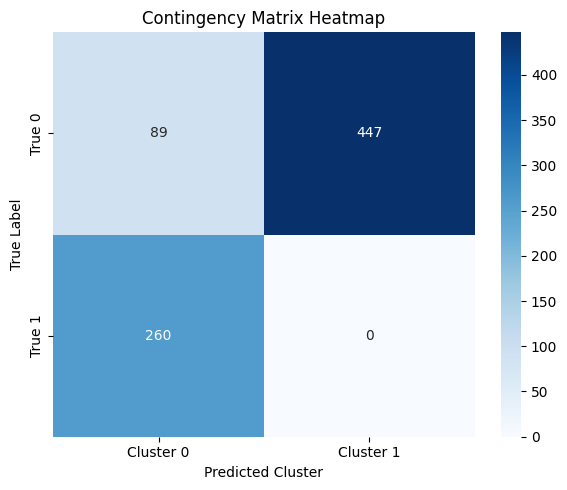


Silhouette Score: 0.2015


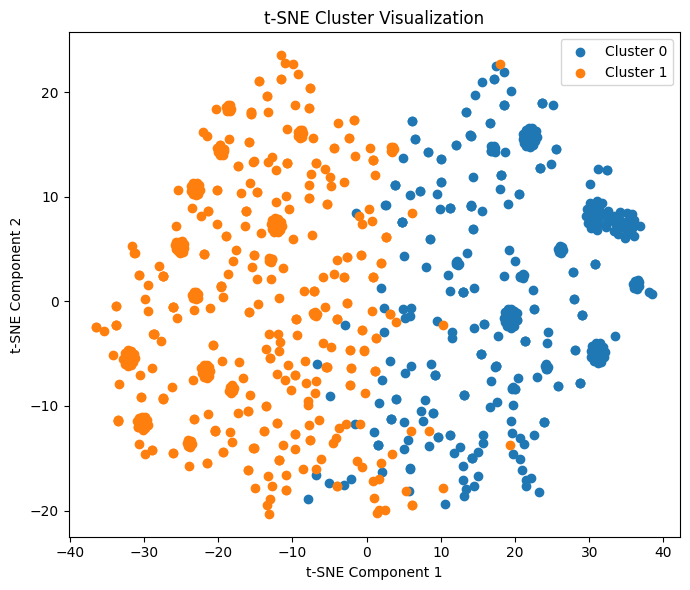

KMeans :: NMI: 0.5812, ARI: 0.6016, SC: 0.2015


In [41]:
from sklearn.cluster import KMeans
# ---------- STEP 1: Setup RandomizedSearchCV for KMeans ----------
param_dist = {
    'n_clusters': [2],  # Fixed to 2 for ASD vs non-ASD
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 50],
    'max_iter': [300, 500, 1000],
    'algorithm': ['lloyd', 'auto', 'full', 'elkan']
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

kmeans = KMeans()
random_search = RandomizedSearchCV(
    kmeans,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit KMeans with best parameters ----------
km = KMeans(**best_params)
kmeans_labels = km.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------
# Contingency matrix (true labels vs predicted clusters)
contingency = plot_contingency_matrix(y_train, kmeans_labels)

# Silhouette score (just as additional validation)
sil_score = silhouette_score(X_train, kmeans_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------
plot_tsne(X_train, kmeans_labels)
calculate_scores(X_train, y_train, kmeans_labels, 'KMeans')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_clusters': 2, 'metric': 'l1', 'linkage': 'average'}


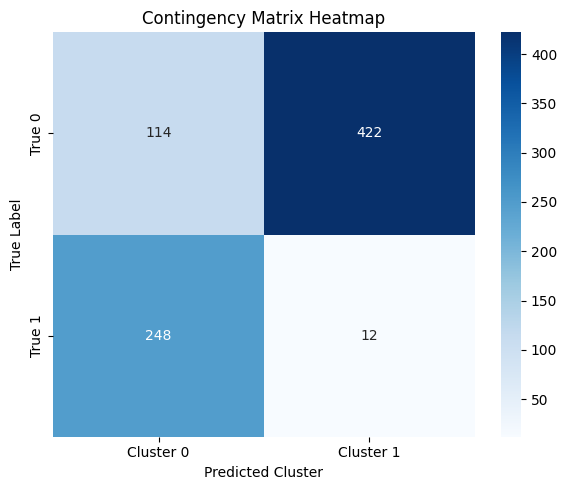


Silhouette Score: 0.1796


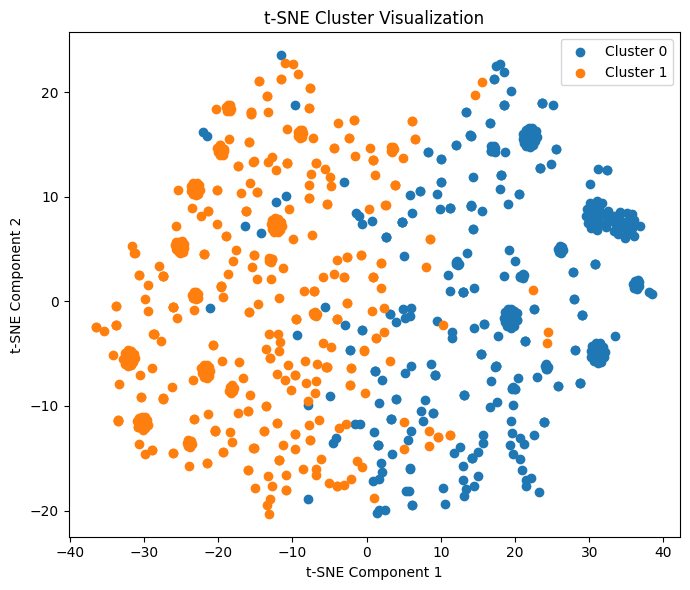

Agglomerative Clustering :: NMI: 0.4232, ARI: 0.4659, SC: 0.1796


In [42]:

# ---------- STEP 1: Setup RandomizedSearchCV for Agglomerative Clustering ----------

param_dist = {
    'n_clusters': [2],  # Fixed for ASD vs non-ASD
    'linkage': ['ward', 'complete', 'average'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

agglo = AgglomerativeClustering()

random_search = RandomizedSearchCV(
    agglo,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Agglomerative Clustering with best parameters ----------

best_agglo = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage'],
    metric=best_params['metric']
)

agglo_labels = best_agglo.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, agglo_labels)
sil_score = silhouette_score(X_train, agglo_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, agglo_labels)

# ---------- STEP 5: Metric Evaluation ----------

calculate_scores(X_train, y_train, agglo_labels, 'Agglomerative Clustering')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'n_components': 2, 'covariance_type': 'full'}


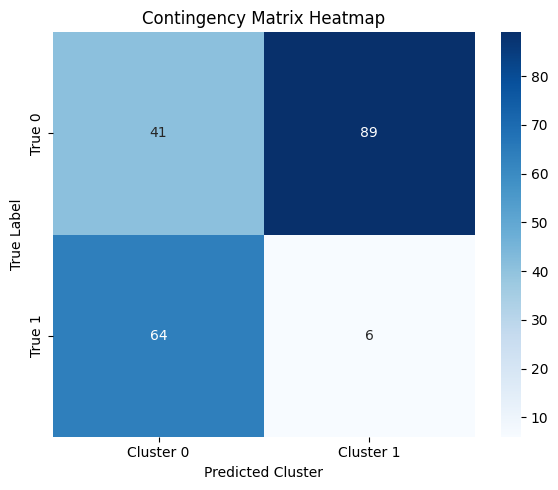


Silhouette Score: 0.1749


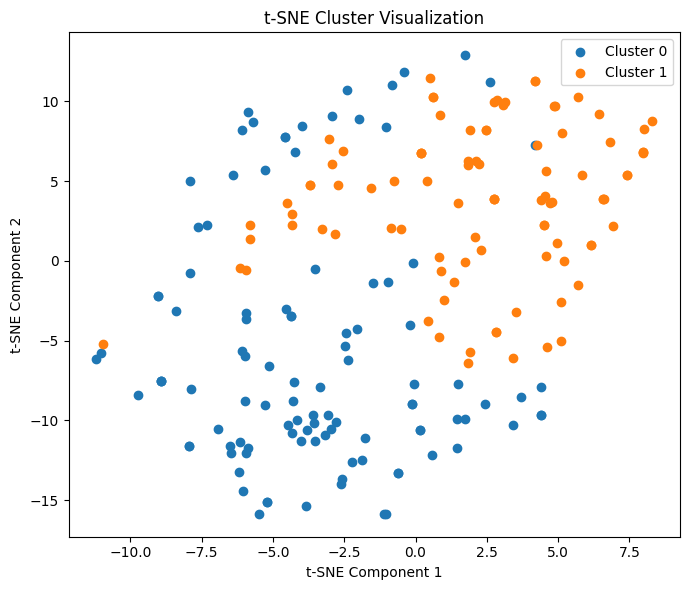

GMM :: NMI: 0.2753, ARI: 0.2774, SC: 0.1749


In [43]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

# ---------- STEP 1: Setup RandomizedSearchCV for GMM ----------
param_grid = {
    'n_components': [2],  # Fixed to 2 for ASD vs non-ASD
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Custom silhouette scorer
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

gmm = GaussianMixture()

random_search = RandomizedSearchCV(
    gmm,
    param_distributions=param_grid,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit GMM with best parameters ----------
best_gmm = GaussianMixture(**best_params)
best_gmm.fit(X_train)
gaus_labels = best_gmm.predict(X_test)

# ---------- STEP 3: Evaluate Clustering ----------
contingency = plot_contingency_matrix(y_test, gaus_labels)
sil_score = silhouette_score(X_test, gaus_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------
plot_tsne(X_test, gaus_labels)

# ---------- STEP 5: Score Metrics ----------
calculate_scores(X_test, y_test, gaus_labels, 'GMM')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_clusters': 2, 'gamma': 1, 'affinity': 'rbf'}


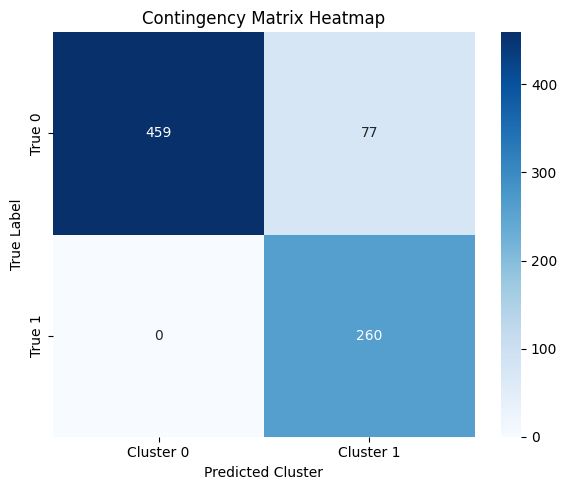


Silhouette Score: 0.2012


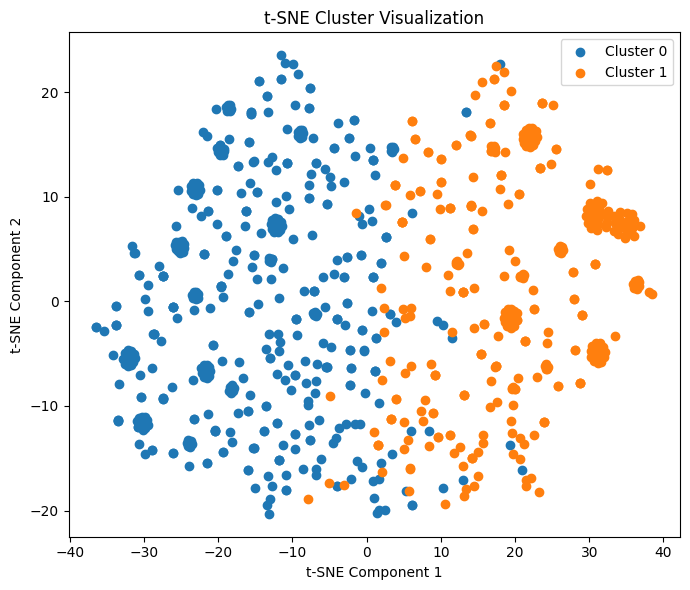

Spectral Clustering :: NMI: 0.6157, ARI: 0.6491, SC: 0.2012


In [44]:
from sklearn.cluster import SpectralClustering

# ---------- STEP 1: Setup RandomizedSearchCV for Spectral Clustering ----------

param_dist = {
    'n_clusters': [2],
    'affinity': ['nearest_neighbors', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

spectral = SpectralClustering()

random_search = RandomizedSearchCV(
    spectral,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Spectral Clustering with best parameters ----------

best_model = SpectralClustering(
    n_clusters=best_params['n_clusters'],
    affinity=best_params['affinity'],
    gamma=best_params['gamma'],
    random_state=42
)

spectral_labels = best_model.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, spectral_labels)
sil_score = silhouette_score(X_train, spectral_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, spectral_labels)

# ---------- STEP 5: Metric Evaluation ----------
calculate_scores(X_train, y_train, spectral_labels, 'Spectral Clustering')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'threshold': 0.5, 'n_clusters': 2, 'branching_factor': 100}


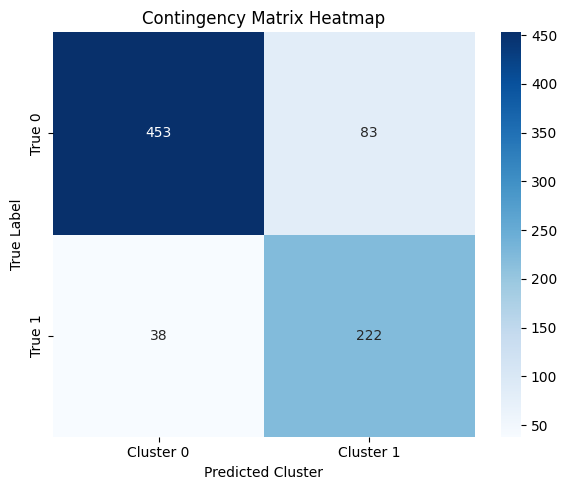


Silhouette Score: 0.1594


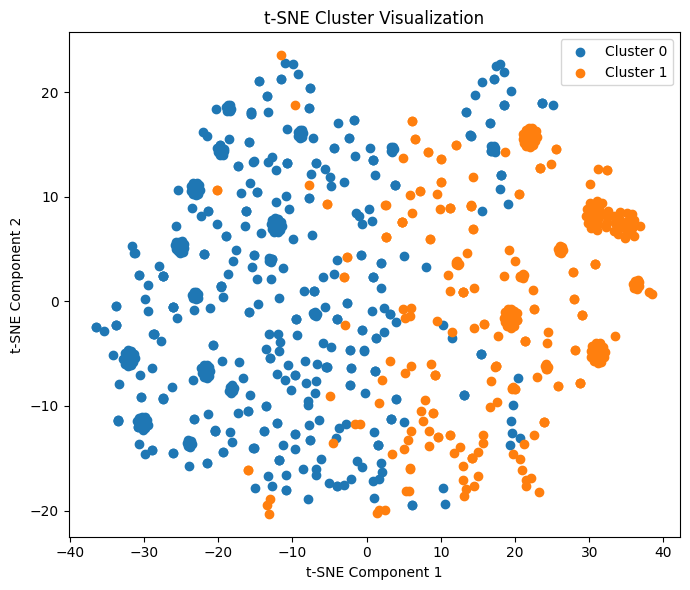

Birch Clustering :: NMI: 0.3692, ARI: 0.4804, SC: 0.1594


In [45]:
from sklearn.cluster import Birch

# ---------- STEP 1: Setup RandomizedSearchCV for Birch Clustering ----------

param_dist = {
    'n_clusters': [2],
    'threshold': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
    'branching_factor': [20, 50, 100, 200]
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

birch = Birch()

random_search = RandomizedSearchCV(
    birch,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Birch with best parameters ----------

best_model = Birch(
    n_clusters=best_params['n_clusters'],
    threshold=best_params['threshold'],
    branching_factor=best_params['branching_factor']
)

birch_labels = best_model.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, birch_labels)
sil_score = silhouette_score(X_train, birch_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, birch_labels)

# ---------- STEP 5: Metric Evaluation ----------
calculate_scores(X_train, y_train, birch_labels, 'Birch Clustering')

In [46]:
import pandas as pd
from sklearn.metrics import (
    normalized_mutual_info_score,
    adjusted_rand_score,
    silhouette_score,
    cohen_kappa_score
)
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is currently of type object (string)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Encode y_train to numeric

# Container to store results
clustering_metrics = []

def clustering_report(model_name, X_data, y_true, y_pred):
    """
    Computes unsupervised clustering metrics and appends results to a list.
    """
    # Use the encoded y_train for metric calculations
    nmi = normalized_mutual_info_score(y_true, y_pred) * 100
    ari = adjusted_rand_score(y_true, y_pred) * 100
    sc = silhouette_score(X_data, y_pred, metric='euclidean') * 100

    clustering_metrics.append({
        "Model": model_name,
        "NMI (%)": round(nmi, 2),
        "ARI (%)": round(ari, 2),
        "Silhouette Score (%)": round(sc, 2)
    })

# ==== Call the report function for each clustering model ====
clustering_report("KMeans", X_train, y_train_encoded, kmeans_labels)
# Predict on the training data for the Gaussian Mixture Model
# Initialize best_gmm with only relevant parameters
best_gmm = GaussianMixture(n_components=2)  # You likely want 2 components for ASD vs non-ASD
best_gmm.fit(X_train)
gaus_labels_train = best_gmm.predict(X_train)  # Predict on training data
clustering_report("Gaussian", X_train, y_train_encoded, gaus_labels_train)  # Use train predictions
clustering_report("Agglomerative", X_train, y_train_encoded, agglo_labels)
clustering_report("Spectral", X_train, y_train_encoded, spectral_labels)
clustering_report("Birch", X_train, y_train_encoded, birch_labels)

# Convert to DataFrame and display
df_clustering_metrics = pd.DataFrame(clustering_metrics)
print(df_clustering_metrics)

           Model  NMI (%)  ARI (%)  Silhouette Score (%)
0         KMeans    58.12    60.16                 20.15
1       Gaussian    31.75    29.35                 17.07
2  Agglomerative    42.32    46.59                 17.96
3       Spectral    61.57    64.91                 20.12
4          Birch    36.92    48.04                 15.94
